
I start analyzing the dataframes

TESLA

In [206]:
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates

In [143]:
data_tesla = pd.read_csv("Data/tesla.csv") 
data_tesla.head(4)

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082


In [144]:
data_tesla.shape

(124, 3)

In [145]:
print(f"Largest value for Tesla in Web Search: {data_tesla.TSLA_WEB_SEARCH.max()}") 
print(f"Smallest value for Tesla in Web Search: {data_tesla.TSLA_WEB_SEARCH.min()}")

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [146]:
data_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


DataFrame has 124 rows and 3 columns: for the Month, the search popularity and the closing price of the Tesla stock.

------------------------------------------------------------------------------------------------------------------------------

UNEMPLOYMENT

In [147]:
data_enemp = pd.read_csv("Data/unemployment.csv") 
data_enemp.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [148]:
data_enemp.shape

(181, 3)

In [149]:
data_enemp.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


In [150]:
print(f'Largest value for "Unemployemnt Benefits" in Web Search: {data_enemp.UE_BENEFITS_WEB_SEARCH.max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


------------------------------------------------------------------------------------------------------------------------------

BITCOIN PRICE AND BITCOIN SEARCH

In [151]:
data_btc_price = pd.read_csv("Data/bitcoin_price.csv")  
data_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [152]:
data_btc_search = pd.read_csv("Data/bitcoin_search.csv") 
data_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [153]:
data_btc_price.shape

(2204, 3)

In [154]:
data_btc_price.describe()

,CLOSE,VOLUME
count,2203.000000,2.203000e+03
mean,4429.421245,8.043622e+09
std,4148.150071,1.176529e+10
min,178.102997,5.914570e+06
25%,433.629502,6.029915e+07
50%,3637.520020,2.018890e+09
75%,7997.372803,1.322478e+10
max,19497.400391,7.415677e+10


In [155]:
data_btc_search.shape

(73, 2)

In [156]:
data_btc_search.describe()

,BTC_NEWS_SEARCH
count,73.000000
mean,15.013699
std,15.146959
min,3.000000
25%,5.000000
50%,14.000000
75%,18.000000
max,100.000000


In [157]:
print(f"Largest BTC News search: {data_btc_search.BTC_NEWS_SEARCH.max()}")

Largest BTC News search: 100


---------------------------------------------------------------------------


I analyze missing values ​​in the 4 dataframes

Data tesla

In [158]:
data_tesla.isnull().sum()

MONTH              0
TSLA_WEB_SEARCH    0
TSLA_USD_CLOSE     0
dtype: int64

Data UNEMPLOYMENT

In [159]:
data_enemp.isnull().sum()

MONTH                     0
UE_BENEFITS_WEB_SEARCH    0
UNRATE                    0
dtype: int64

DATA BITCOIN PRICE AND BITCOIN SEARCH

In [160]:
data_btc_price.isnull().sum() 


DATE      0
CLOSE     1
VOLUME    1
dtype: int64

In [161]:
data_btc_price[data_btc_price.CLOSE.isna()]

,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


In [162]:
#delete NaN
data_btc_price = data_btc_price.dropna()

In [163]:
data_btc_search.isnull().sum()

MONTH              0
BTC_NEWS_SEARCH    0
dtype: int64

----------------------------------------------------------------------------------------------

I confirm and convert if necessary the dates into datetime

In [164]:
data_tesla["MONTH"].dtype

dtype('O')

Convert date tesla datetime

In [165]:
data_tesla["MONTH"] = pd.to_datetime(data_tesla["MONTH"])

---------------------------------------------------------------------------------------------------------------------------

In [166]:
data_enemp["MONTH"].dtype

dtype('O')

Convert date enemp datetime

In [167]:
data_enemp["MONTH"] = pd.to_datetime(data_enemp["MONTH"])

-------------------------------------------------------------------------------------------------------------

In [168]:
data_btc_price["DATE"].dtype

dtype('O')

In [169]:
data_btc_search["MONTH"].dtype

dtype('O')

Convert date btc price and btc search

In [170]:
data_btc_price["DATE"] = pd.to_datetime(data_btc_price["DATE"]) 
data_btc_search["MONTH"] = pd.to_datetime(data_btc_search["MONTH"])


I check if the changes were made

In [171]:
#data_tesla.MONTH.head() 
#data_enemp.MONTH.head()  
#data_btc_price.DATE.head() 
#data_btc_search.MONTH.head()

now I need the Bitcoin price and our Bitcoin search volume to be comparable. Our Bitcoin price is daily data, but our Bitcoin search popularity is monthly data.

In [177]:
data_btc_month = data_btc_price.resample("M", on="DATE").last()

In [178]:
data_btc_month = data_btc_price.resample("M", on="DATE").mean()

In [180]:
data_btc_month.shape

(73, 2)

In [183]:
data_btc_search.shape

(73, 2)

Data data_btc_search = data_btc_month

In [187]:
data_btc_search

,MONTH,BTC_NEWS_SEARCH
0,2014-09-01,5
1,2014-10-01,4
2,2014-11-01,4
3,2014-12-01,4
4,2015-01-01,5
...,...,...
68,2020-05-01,22
69,2020-06-01,13
70,2020-07-01,14
71,2020-08-01,16


In [186]:
data_btc_month

,CLOSE,VOLUME
DATE,,
2014-09-30,407.182428,2.934864e+07
2014-10-31,364.148873,2.912885e+07
2014-11-30,366.099799,2.199111e+07
2014-12-31,341.267871,1.784201e+07
2015-01-31,248.782547,3.544555e+07
...,...,...
2020-05-31,9263.151745,4.149575e+10
2020-06-30,9489.227214,2.169711e+10
2020-07-31,9589.899729,1.760688e+10


----------------------------------------------------------------------------------------------------------------------------------

Create a basic line chart of the Tesla stock price and the search popularity

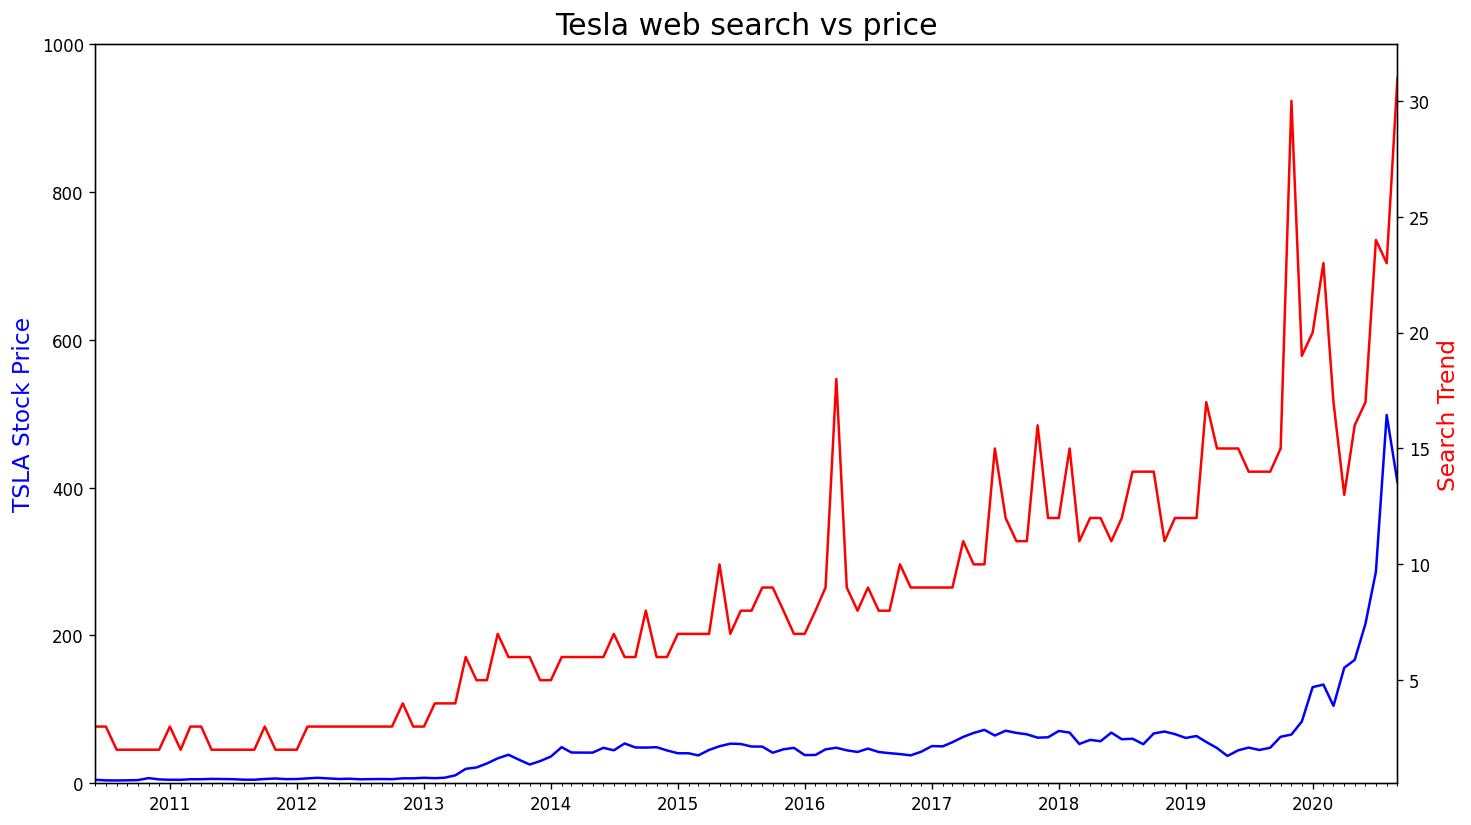

In [210]:
plt.figure(figsize=(14,8), dpi=120) 
plt.title("Tesla web search vs price", fontsize=18)
 
 
ax1 = plt.gca() 
ax2 = ax1.twinx() 

ax1.set_ylabel("TSLA Stock Price", color="blue", fontsize=14) 
ax2.set_ylabel("Search Trend", color="red", fontsize=14)  
 
ax1.set_ylim([0, 1000]) 
ax2.set_xlim([data_tesla.MONTH.min(), data_tesla.MONTH.max()])

ax1.plot(data_tesla.MONTH, data_tesla.TSLA_USD_CLOSE, color="blue") 
ax2.plot(data_tesla.MONTH, data_tesla.TSLA_WEB_SEARCH, color="red")  

years = mdates.YearLocator() 
months = mdates.MonthLocator() 
years_fmt = mdates.DateFormatter("%Y") 
 
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
 
plt.show()

I can see that there are 2 very high peaks in the graph, searching on the web in those years Tesla brought out car models

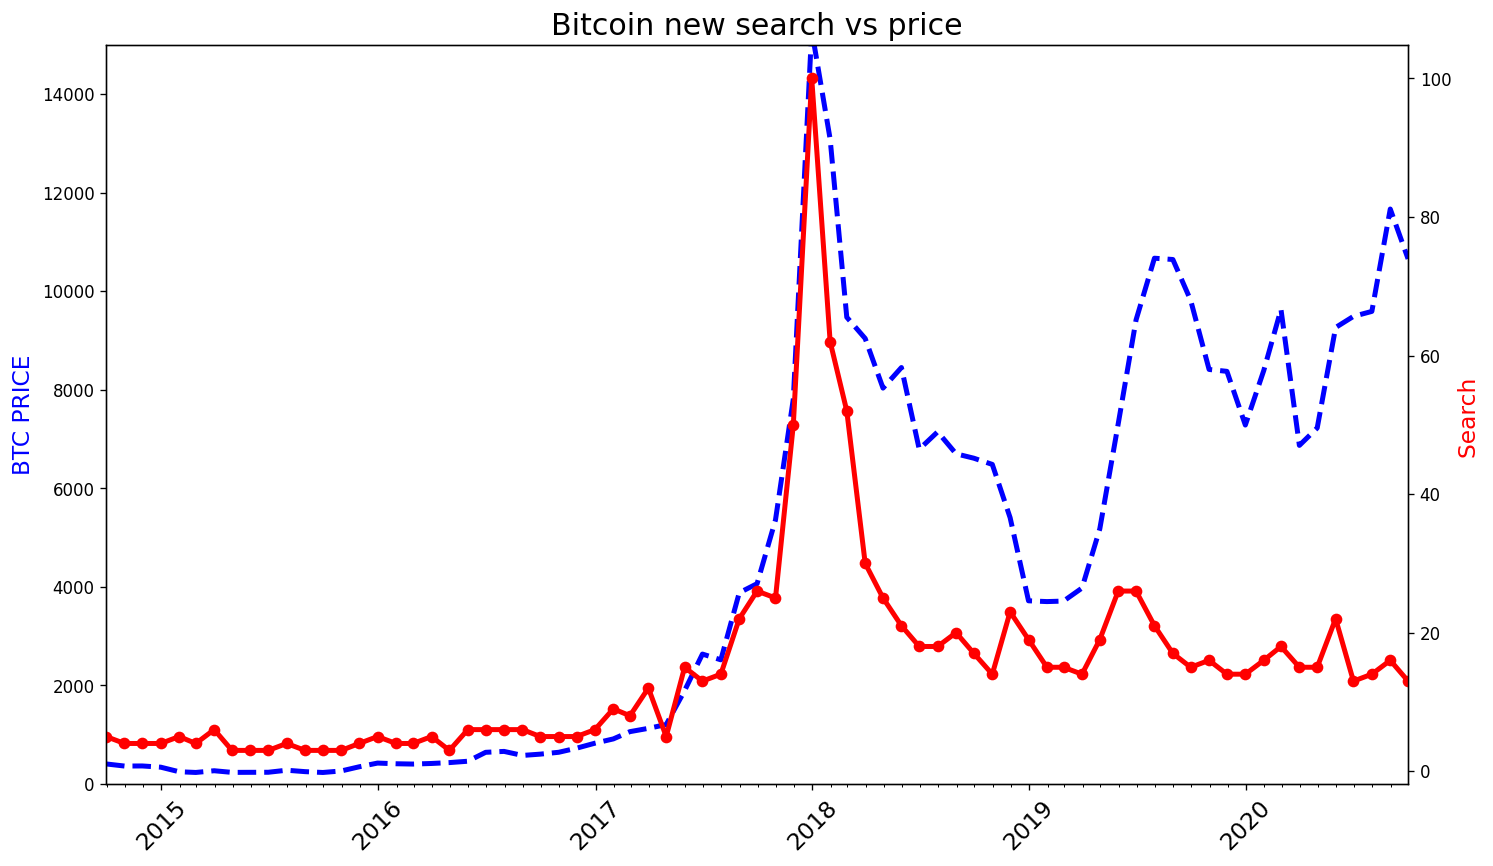

In [213]:
plt.figure(figsize=(14,8), dpi=120) 
plt.title("Bitcoin new search vs price", fontsize=18) 
plt.xticks(fontsize=14, rotation=45)
 
 
ax1 = plt.gca() 
ax2 = ax1.twinx() 

ax1.set_ylabel("BTC PRICE", color="blue", fontsize=14) 
ax2.set_ylabel("Search ", color="red", fontsize=14)  
 
ax1.set_ylim([0, 15000]) 
ax2.set_xlim([data_btc_month.index.min(), data_btc_month.index.max()])

ax1.plot(data_btc_month.index, data_btc_month.CLOSE, color="blue", linewidth=3, linestyle="--") 
ax2.plot(data_btc_month.index, data_btc_search.BTC_NEWS_SEARCH, color="red", linewidth=3, marker="o")  

years = mdates.YearLocator() 
months = mdates.MonthLocator() 
years_fmt = mdates.DateFormatter("%Y") 
 
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
 
plt.show()

Price movements in the beginning of 2018 are associated with very high search volumes. Everyone was talking about (and buying) Bitcoin in late 2017/early 2018 so search volumes were at a record high!  Interestingly, there was quite a huge spike in bitcoin prices in Q1 of 2019, but this time the increase in search volume was much less pronounced (perhaps because at this point everyone knew what Bitcoin was).

Unemployment

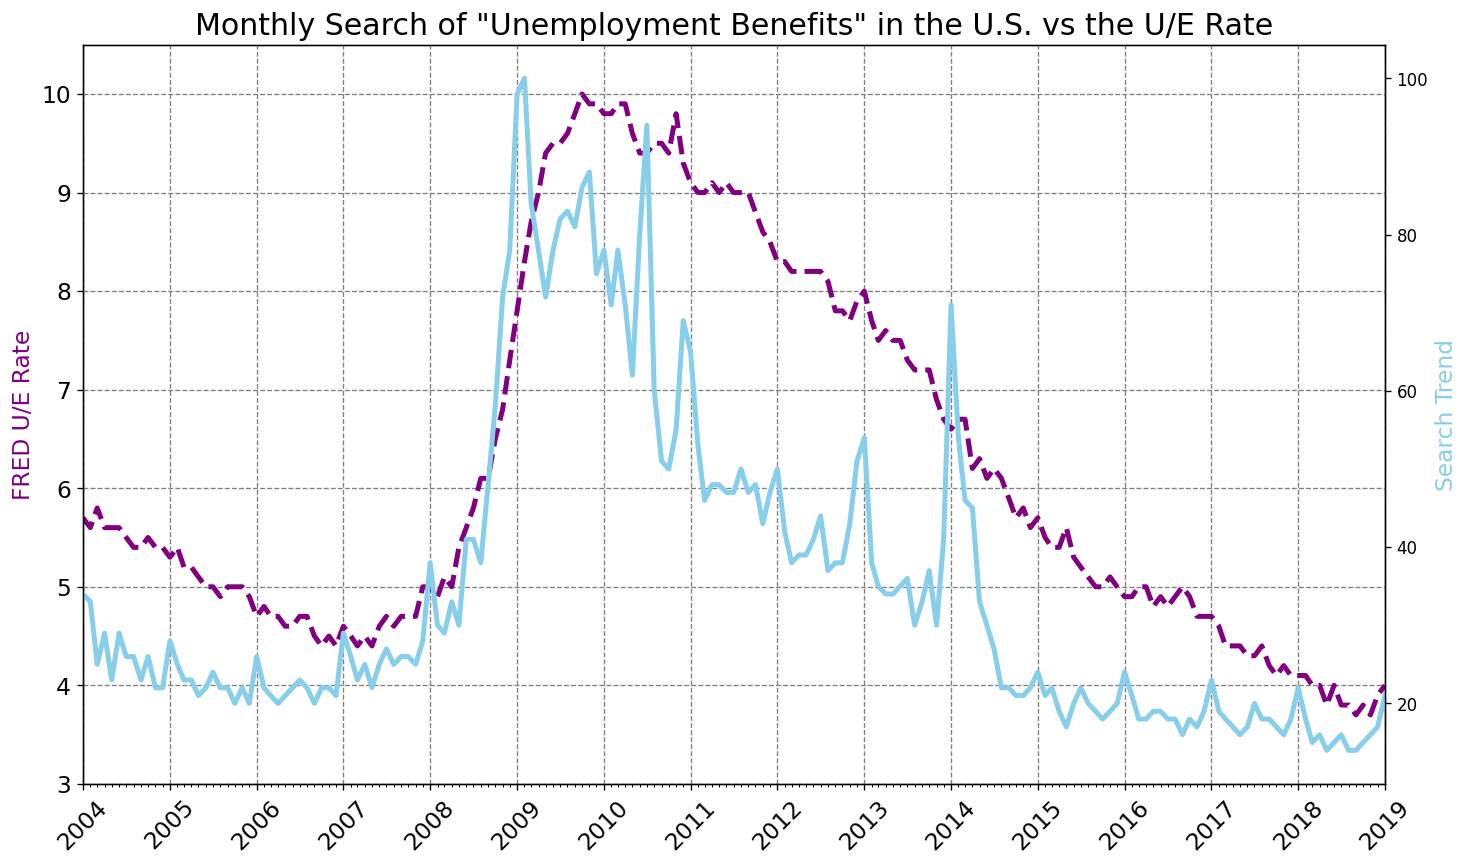

In [221]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)
 
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
 
ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([data_enemp.MONTH.min(), data_enemp.MONTH.max()])
 
ax1.grid(color='grey', linestyle='--')

ax1.plot(data_enemp.MONTH, data_enemp.UNRATE, color='purple', linewidth=3, linestyle='--')
ax2.plot(data_enemp.MONTH, data_enemp.UE_BENEFITS_WEB_SEARCH, color='skyblue', linewidth=3)
 
plt.show()

I see that the financial crisis in 2007/2008 caused a massive spike in unemployment, It took around 10 years (2007-2017) for the unemployment to reach the same level it had before the crisis. 

In [222]:
roll_data = data_enemp[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

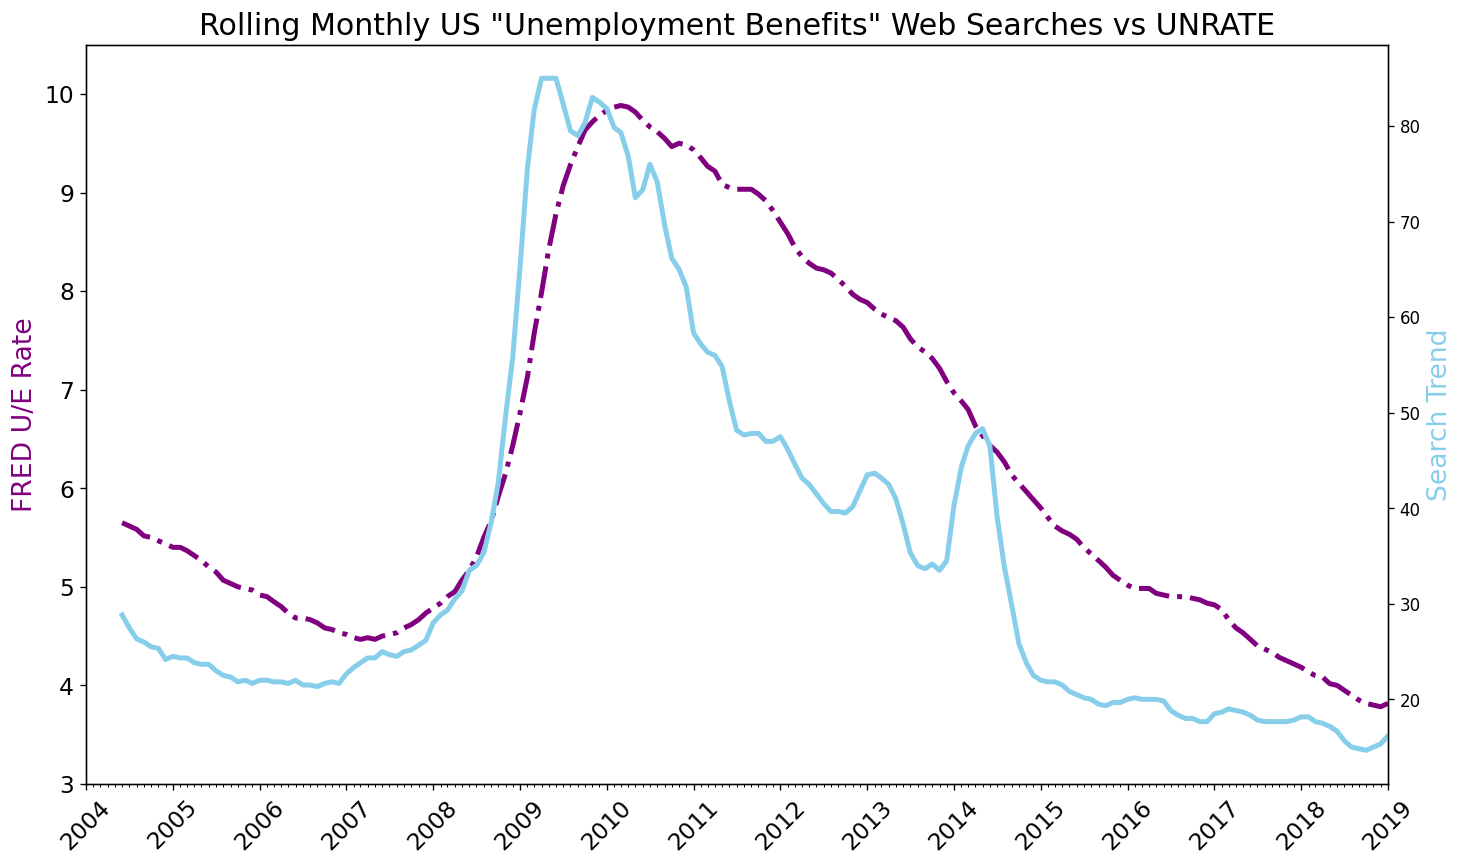

In [225]:
plt.figure(figsize=(14,8), dpi=120)
plt.title("Rolling Monthly US "Unemployment Benefits" Web Searches vs UNRATE", fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
 
ax1.set_ylabel("FRED U/E Rate", color="red", fontsize=16)
ax2.set_ylabel("Search Trend", color="blue", fontsize=16)
 
ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([data_enemp.MONTH[0], data_enemp.MONTH.max()])
 
# Calculate the rolling average over a 6 month window
roll_df = data_enemp[["UE_BENEFITS_WEB_SEARCH", "UNRATE"]].rolling(window=6).mean()
 
ax1.plot(data_enemp.MONTH, roll_data.UNRATE, "red", linewidth=3, linestyle="-.")
ax2.plot(data_enemp.MONTH, roll_data.UE_BENEFITS_WEB_SEARCH, "blue", linewidth=3)
 
plt.show()

I see that searches for "Unemployment Benefits" happen before the actual official unemployment rate goes up. Similarly, the search popularity for the term goes down before the unemployment rate decreases. In other words, these searches seem to act as a leading economic indicator for the unemployment rate

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

I see how 2020 affects analysis

In [232]:
data_eu_2020 = pd.read_csv("Data/Benefits_Search_vs_Rate_2004_20.csv") 
data_eu_2020.MONTH = pd.to_datetime(data_eu_2020.MONTH)

In [233]:
data_eu_2020

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,9,5.7
1,2004-02-01,8,5.6
2,2004-03-01,7,5.8
3,2004-04-01,8,5.6
4,2004-05-01,6,5.6
...,...,...,...
195,2020-04-01,100,14.7
196,2020-05-01,63,13.3
197,2020-06-01,53,11.1
198,2020-07-01,54,10.2


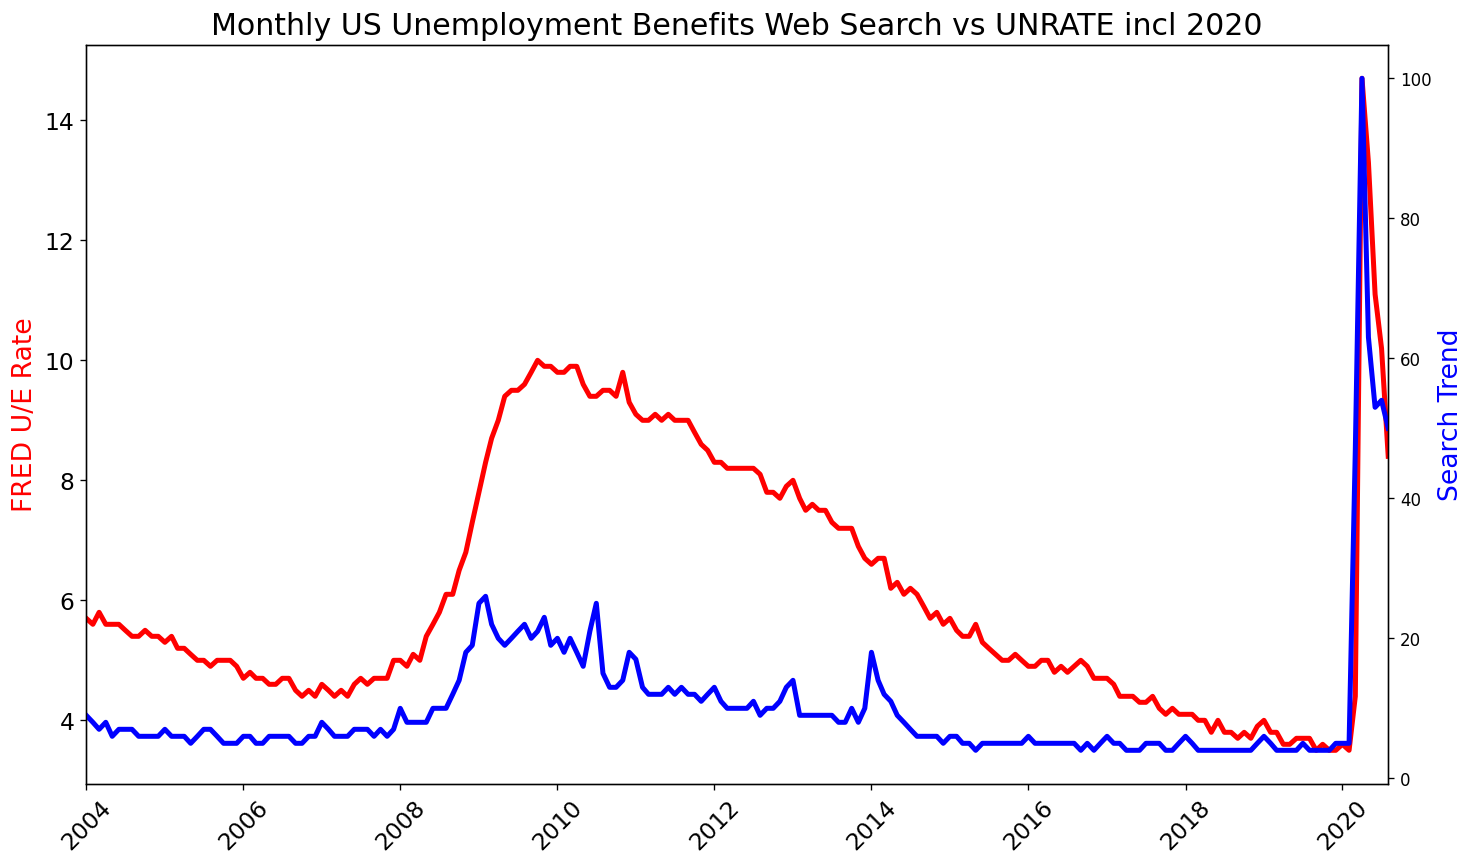

In [235]:
plt.figure(figsize=(14,8), dpi=120)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.title("Monthly US Unemployment Benefits Web Search vs UNRATE incl 2020", fontsize=18)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('FRED U/E Rate', color="red", fontsize=16)
ax2.set_ylabel('Search Trend', color="blue", fontsize=16)
 
ax1.set_xlim([data_eu_2020.MONTH.min(), data_eu_2020.MONTH.max()])
 
ax1.plot(data_eu_2020.MONTH, data_eu_2020.UNRATE, "red", linewidth=3)
ax2.plot(data_eu_2020.MONTH, data_eu_2020.UE_BENEFITS_WEB_SEARCH, "blue", linewidth=3)
 
plt.show()

I can see that in 2020 unemployment and job search skyrocketed. This may be due to the COVID pandemic